In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from sklearn import  metrics

import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

### ladowanie danych 

In [2]:
data = pd.read_csv('http://web.stanford.edu/class/stats191/data/ames2000_NAfix.csv')

In [71]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,New,Partial
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,MnPrv,None,0,4,2010,WD,Normal
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,4,2009,WD,Normal
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,0,None,None,None,0,6,2009,WD,Alloca
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,9,2006,New,Partial


In [4]:
X.shape

(2000, 79)

In [5]:
X.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street',
       'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st',
       'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual',
       'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Ga

### Stworzenie list kolumn w zalerznosci od kategorii danych - na podstawie dokumentacji

In [6]:
continues = ['Lot.Frontage','Lot.Area', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 
             'Total.Bsmt.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF','Gr.Liv.Area', 'Garage.Area', 
            'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area',
            'Misc.Val']
nominal = ['MS.SubClass','MS.Zoning', 'Street','Alley', 'Land.Contour', 'Lot.Config', 'Neighborhood', 'Condition.1', 
           'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 
           'Mas.Vnr.Type', 'Foundation', 'Heating', 'Central.Air', 'Garage.Type', 'Misc.Feature','Sale.Type', 
           'Sale.Condition']
ordinal = ['Lot.Shape', 'Utilities', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Exter.Qual', 'Exter.Cond', 
           'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.Type.2', 'Heating.QC', 
           'Electrical', 'Kitchen.Qual', 'Functional', 'Fireplace.Qu', 'Garage.Finish', 'Garage.Qual', 'Garage.Cond', 
           'Paved.Drive', 'Pool.QC', 'Fence']
discret = ['Year.Built', 'Year.Remod.Add', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath',
           'Bedroom.AbvGr', 'Kitchen.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Yr.Blt', 'Garage.Cars',
          'Mo.Sold', 'Yr.Sold']

## Analiza i oczyszczanie danych z zbioru continues

sprawdzamy czy  sklasyfikowane jako zmienne numeryczne

In [7]:
col_continues_not_numerical = [(col, X[col].dtype) for col in continues if ((X[col].dtype != 'int64') and (X[col].dtype != 'float64'))]
col_continues_not_numerical

[('Lot.Frontage', dtype('O')),
 ('Mas.Vnr.Area', dtype('O')),
 ('BsmtFin.SF.1', dtype('O')),
 ('BsmtFin.SF.2', dtype('O')),
 ('Bsmt.Unf.SF', dtype('O')),
 ('Total.Bsmt.SF', dtype('O')),
 ('Garage.Area', dtype('O'))]

zmienna nie sklasyfikowane jako numeryczne zawieraja 'None' zmieniamy na zmienne typu 'NaN'

In [8]:
X[continues] = X[continues].replace({'None': np.nan})

teraz mozemy przeksztalcic na zmienne typu numerycznego

In [9]:
not_float =  [col for col in continues if (X[col].dtype != 'float64')]
X[not_float] = X[not_float].astype('float64')

In [10]:
X[continues].dtypes

Lot.Frontage       float64
Lot.Area           float64
Mas.Vnr.Area       float64
BsmtFin.SF.1       float64
BsmtFin.SF.2       float64
Bsmt.Unf.SF        float64
Total.Bsmt.SF      float64
X1st.Flr.SF        float64
X2nd.Flr.SF        float64
Low.Qual.Fin.SF    float64
Gr.Liv.Area        float64
Garage.Area        float64
Wood.Deck.SF       float64
Open.Porch.SF      float64
Enclosed.Porch     float64
X3Ssn.Porch        float64
Screen.Porch       float64
Pool.Area          float64
Misc.Val           float64
dtype: object

pozostaje pozbyc sie NaN-ow, podstawiamy za nie wartosci srednie

In [11]:
X[continues].isna().sum()

Lot.Frontage       334
Lot.Area             0
Mas.Vnr.Area        16
BsmtFin.SF.1         1
BsmtFin.SF.2         1
Bsmt.Unf.SF          1
Total.Bsmt.SF        1
X1st.Flr.SF          0
X2nd.Flr.SF          0
Low.Qual.Fin.SF      0
Gr.Liv.Area          0
Garage.Area          1
Wood.Deck.SF         0
Open.Porch.SF        0
Enclosed.Porch       0
X3Ssn.Porch          0
Screen.Porch         0
Pool.Area            0
Misc.Val             0
dtype: int64

Uzupelniamy brakujace dane watosciami srednimi

In [12]:
X[continues] = X[continues].fillna(X[continues].mean())

## Analiza i oczyszczanie danych z zbioru discret

zmienna zawieraja 'None' zamiast 'NaN', zmieniamy na 'NaN' aby dalej moc pozbyc sie brakujacych danych

In [13]:
X[discret] = X[discret].replace({'None': np.nan})

In [14]:
X[discret].isna().sum()

Year.Built          0
Year.Remod.Add      0
Bsmt.Full.Bath      1
Bsmt.Half.Bath      1
Full.Bath           0
Half.Bath           0
Bedroom.AbvGr       0
Kitchen.AbvGr       0
TotRms.AbvGrd       0
Fireplaces          0
Garage.Yr.Blt     112
Garage.Cars         1
Mo.Sold             0
Yr.Sold             0
dtype: int64

Jesli 'Garage.Finish' NaN to nie ma garazu

In [15]:
print(X[['Garage.Finish', 'Garage.Cars']][X['Garage.Cars'].isna()])
print(X[['Garage.Finish', 'Garage.Cars']][X['Garage.Finish'].isna()])

    Garage.Finish Garage.Cars
511           NaN         NaN
    Garage.Finish Garage.Cars
362           NaN           1
511           NaN         NaN


In [16]:
print(X[['Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath']][X['Bsmt.Full.Bath'].isna()])

    Bsmt.Full.Bath Bsmt.Half.Bath  Full.Bath  Half.Bath
682            NaN            NaN          1          0


Brak daty lub ile samochodow w wszystkich przypadkach wynika z tego ze grarazu nie ma, zmieniamy na wartosc 0

In [17]:
X[['Garage.Yr.Blt','Garage.Cars']] = X[['Garage.Yr.Blt','Garage.Cars']].fillna(0)

Pojedycze wystpienie, zastepujemy wartoscia najczesciej wystepujaca: 0

In [18]:
print(X.groupby('Bsmt.Full.Bath')['Bsmt.Full.Bath'].count())
print(X.groupby('Bsmt.Half.Bath')['Bsmt.Half.Bath'].count())

Bsmt.Full.Bath
0    1154
1     818
2      26
3       1
Name: Bsmt.Full.Bath, dtype: int64
Bsmt.Half.Bath
0    1870
1     125
2       4
Name: Bsmt.Half.Bath, dtype: int64


In [19]:
X[['Bsmt.Full.Bath','Bsmt.Half.Bath']] = X[['Bsmt.Full.Bath','Bsmt.Half.Bath']].fillna(0)

In [20]:
X[discret].isna().sum()

Year.Built        0
Year.Remod.Add    0
Bsmt.Full.Bath    0
Bsmt.Half.Bath    0
Full.Bath         0
Half.Bath         0
Bedroom.AbvGr     0
Kitchen.AbvGr     0
TotRms.AbvGrd     0
Fireplaces        0
Garage.Yr.Blt     0
Garage.Cars       0
Mo.Sold           0
Yr.Sold           0
dtype: int64

Wszystkie NaNy z zmiennych dyskretnych usunieto, mozemy zmienic na int - nie sa to zmienne ciagle tylko dyskretne

In [21]:
X[discret] = X[discret].astype('int64')
X[discret].dtypes

Year.Built        int64
Year.Remod.Add    int64
Bsmt.Full.Bath    int64
Bsmt.Half.Bath    int64
Full.Bath         int64
Half.Bath         int64
Bedroom.AbvGr     int64
Kitchen.AbvGr     int64
TotRms.AbvGrd     int64
Fireplaces        int64
Garage.Yr.Blt     int64
Garage.Cars       int64
Mo.Sold           int64
Yr.Sold           int64
dtype: object

## nominal

zmienna zawieraja 'None' zamiast 'NaN', zmieniamy na 'NaN' aby dalej moc pozbyc sie brakujacych danych

In [22]:
X[nominal] = X[nominal].replace({'None': np.nan})

In [23]:
X[nominal].isna().sum()

MS.SubClass          0
MS.Zoning            0
Street               0
Alley             1865
Land.Contour         0
Lot.Config           0
Neighborhood         0
Condition.1          0
Condition.2          0
Bldg.Type            0
House.Style          0
Roof.Style           0
Roof.Matl            0
Exterior.1st         0
Exterior.2nd         0
Mas.Vnr.Type      1232
Foundation           0
Heating              0
Central.Air          0
Garage.Type        110
Misc.Feature      1926
Sale.Type            0
Sale.Condition       0
dtype: int64

Zgodnie z dokumentacja None(u nas zmieniony na Nan) w Alley oznacza No alley access

In [24]:
X['Alley'] = X['Alley'].fillna('No_access')

Zgodnie z dokumentacja None(u nas zmieniony na Nan) w Garage.Type to brak danego elementu w domu

In [25]:
X['Mas.Vnr.Type'] = X['Mas.Vnr.Type'].fillna('nothing')

Zgodnie z dokumentacja None(u nas zmieniony na Nan) w Misc.Feature to brak danego elementu w domu

In [26]:
X['Garage.Type'] = X['Garage.Type'].fillna('no_grage')

Zgodnie z dokumentacja None(u nas zmieniony na Nan) w Mas.Vnr.Type to brak danego elementu w domu

In [27]:
X['Misc.Feature'] = X['Misc.Feature'].fillna('nothing')

In [28]:
X[nominal].isna().sum()

MS.SubClass       0
MS.Zoning         0
Street            0
Alley             0
Land.Contour      0
Lot.Config        0
Neighborhood      0
Condition.1       0
Condition.2       0
Bldg.Type         0
House.Style       0
Roof.Style        0
Roof.Matl         0
Exterior.1st      0
Exterior.2nd      0
Mas.Vnr.Type      0
Foundation        0
Heating           0
Central.Air       0
Garage.Type       0
Misc.Feature      0
Sale.Type         0
Sale.Condition    0
dtype: int64

nominal czyli zmienne kategorialne, zmieniamy typ aby wszystkie byly kategoryczne

In [29]:
X[nominal].dtypes

MS.SubClass        int64
MS.Zoning         object
Street            object
Alley             object
Land.Contour      object
Lot.Config        object
Neighborhood      object
Condition.1       object
Condition.2       object
Bldg.Type         object
House.Style       object
Roof.Style        object
Roof.Matl         object
Exterior.1st      object
Exterior.2nd      object
Mas.Vnr.Type      object
Foundation        object
Heating           object
Central.Air       object
Garage.Type       object
Misc.Feature      object
Sale.Type         object
Sale.Condition    object
dtype: object

mapujemy rowniez aby dane byly zgodne z dokumentacja, nie ma to znaczenia dla analizy zmienna i tak jest jako kategorialna 

In [30]:
col_MS_SubClass = pd.Categorical(X['MS.SubClass'].astype('str'), ordered=False)
X['MS.SubClass'] = col_MS_SubClass.map({'20':'020','30':'030','40':'040','45':'045','50':'050','60':'060',
                                        '70':'070','75':'075','80':'080','85':'085','90':'090','120':'120',
                                        '150':'150','160':'160','180':'180','190':'190'})

## ordinal

In [31]:
X[ordinal].dtypes

Lot.Shape         object
Utilities         object
Land.Slope        object
Overall.Qual       int64
Overall.Cond       int64
Exter.Qual        object
Exter.Cond        object
Bsmt.Qual         object
Bsmt.Cond         object
Bsmt.Exposure     object
BsmtFin.Type.1    object
BsmtFin.Type.2    object
Heating.QC        object
Electrical        object
Kitchen.Qual      object
Functional        object
Fireplace.Qu      object
Garage.Finish     object
Garage.Qual       object
Garage.Cond       object
Paved.Drive       object
Pool.QC           object
Fence             object
dtype: object

In [32]:
X[ordinal].isna().sum()

Lot.Shape         0
Utilities         0
Land.Slope        0
Overall.Qual      0
Overall.Cond      0
Exter.Qual        0
Exter.Cond        0
Bsmt.Qual         1
Bsmt.Cond         1
Bsmt.Exposure     3
BsmtFin.Type.1    1
BsmtFin.Type.2    2
Heating.QC        0
Electrical        0
Kitchen.Qual      0
Functional        0
Fireplace.Qu      0
Garage.Finish     2
Garage.Qual       1
Garage.Cond       1
Paved.Drive       0
Pool.QC           0
Fence             0
dtype: int64

 Zgodnie z dokumentacja NaN to osobne kategorie w zmiennych oznaczajace brak danego elementu w domu, zmieniamy je na "NA"

In [33]:
X[ordinal] = X[ordinal].fillna('NA')

In [34]:
X[ordinal] = X[ordinal].replace({'None': 'NA'})

Zmienne porzadkowe, wiec mapujemy je do int 

In [35]:
dict_LotShape = {"Reg": 3,"IR1":2,"IR2":1,"IR3":0}
X['Lot.Shape'] = X['Lot.Shape'].map(dict_LotShape)

dict_Utilites = {"AllPub": 3,"NoSewr":2,"NoSeWa":1,"ELO":0}
X['Utilities'] = X['Utilities'].map(dict_Utilites)

dict_LandSlope = {"Gtl":2,"Mod":1,"Sev":0}
X['Land.Slope'] = X['Land.Slope'].map(dict_LandSlope)

dict_Exter = {"Ex":4,"Gd":3,"TA":2,"Fa":1, "Po":0}
X['Exter.Qual'] = X['Exter.Qual'].map(dict_Exter)
X['Exter.Cond'] = X['Exter.Cond'].map(dict_Exter)
X['Heating.QC'] = X['Heating.QC'].map(dict_Exter)
X['Kitchen.Qual'] = X['Kitchen.Qual'].map(dict_Exter)

dict_Bsmt = {"Ex":5,"Gd":4,"TA":3,"Fa":2, "Po":1, "NA":0}
X['Bsmt.Qual'] = X['Bsmt.Qual'].map(dict_Bsmt)
X['Bsmt.Cond'] = X['Bsmt.Cond'].map(dict_Bsmt)
X['Fireplace.Qu'] = X['Fireplace.Qu'].map(dict_Bsmt)
X['Garage.Qual'] = X['Garage.Qual'].map(dict_Bsmt)
X['Garage.Cond'] = X['Garage.Cond'].map(dict_Bsmt)
X['Pool.QC'] = X['Pool.QC'].map(dict_Bsmt)

dict_BsmtExposure = {"Gd":4,"Av":3,"Mn":2,"No":1, "NA":0}
X['Bsmt.Exposure'] = X['Bsmt.Exposure'].map(dict_BsmtExposure)

dict_BsmtFin = {"GLQ":6,"ALQ":5,"BLQ":4,"Rec":3, "LwQ":2, "Unf":1, "NA":0}
X['BsmtFin.Type.1'] = X['BsmtFin.Type.1'].map(dict_BsmtFin)
X['BsmtFin.Type.2'] = X['BsmtFin.Type.2'].map(dict_BsmtFin)

dict_Electrical = {"SBrkr":4,"FuseA":3,"FuseF":2,"FuseP":1, "Mix":0}
X['Electrical'] = X['Electrical'].map(dict_Electrical)

dict_Functional = {"Typ":7, "Min1":6,"Min2":5,"Mod":4,"Maj1":3, "Maj2":2, "Sev":1, "Sal":0}
X['Functional'] = X['Functional'].map(dict_Functional)

dict_GarageFinish = {"Fin":3,"RFn":2,"Unf":1,"NA":0}
X['Garage.Finish'] = X['Garage.Finish'].map(dict_GarageFinish)

dict_PavedDrive = {"Y":2, "P":1, "N":0}
X['Paved.Drive'] = X['Paved.Drive'].map(dict_PavedDrive)

dict_Fence = {"GdPrv":4,"MnPrv":3,"GdWo":2,"MnWw":1, "NA":0}
X['Fence'] = X['Fence'].map(dict_Fence)

In [36]:
X[ordinal].isna().sum()

Lot.Shape         0
Utilities         0
Land.Slope        0
Overall.Qual      0
Overall.Cond      0
Exter.Qual        0
Exter.Cond        0
Bsmt.Qual         0
Bsmt.Cond         0
Bsmt.Exposure     0
BsmtFin.Type.1    0
BsmtFin.Type.2    0
Heating.QC        0
Electrical        0
Kitchen.Qual      0
Functional        0
Fireplace.Qu      0
Garage.Finish     0
Garage.Qual       0
Garage.Cond       0
Paved.Drive       0
Pool.QC           0
Fence             0
dtype: int64

# Analiza i wizualizacja danych

In [37]:
for col in X[nominal]:
    print(col, X[col].unique().size)

MS.SubClass 16
MS.Zoning 7
Street 2
Alley 3
Land.Contour 4
Lot.Config 5
Neighborhood 27
Condition.1 9
Condition.2 7
Bldg.Type 5
House.Style 8
Roof.Style 6
Roof.Matl 7
Exterior.1st 14
Exterior.2nd 16
Mas.Vnr.Type 5
Foundation 6
Heating 6
Central.Air 2
Garage.Type 7
Misc.Feature 5
Sale.Type 10
Sale.Condition 6


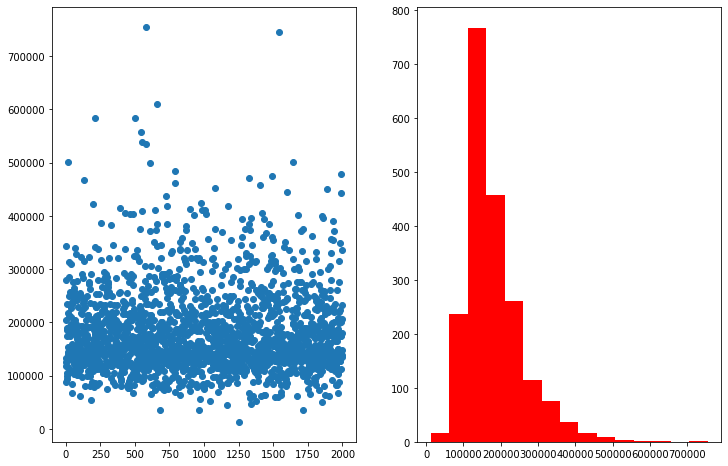

In [38]:
index = [x for x in range(0,2000)]
f,ax=plt.subplots(1,2, figsize=(12,8))
ax[0].scatter(index, y.values)
ax[1].hist(y.values, 15, color='r')
plt.show()

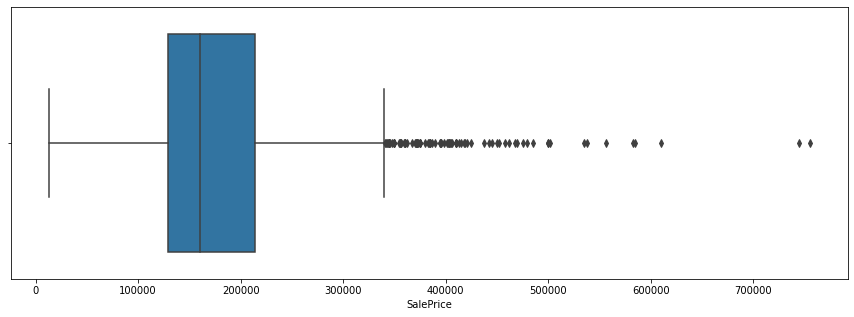

In [39]:
plt.figure(figsize=(15,5))
sns.boxplot(y)

plt.show()

Wizualizacja macierzu korelacji - nie czytelna za duzo kolumn

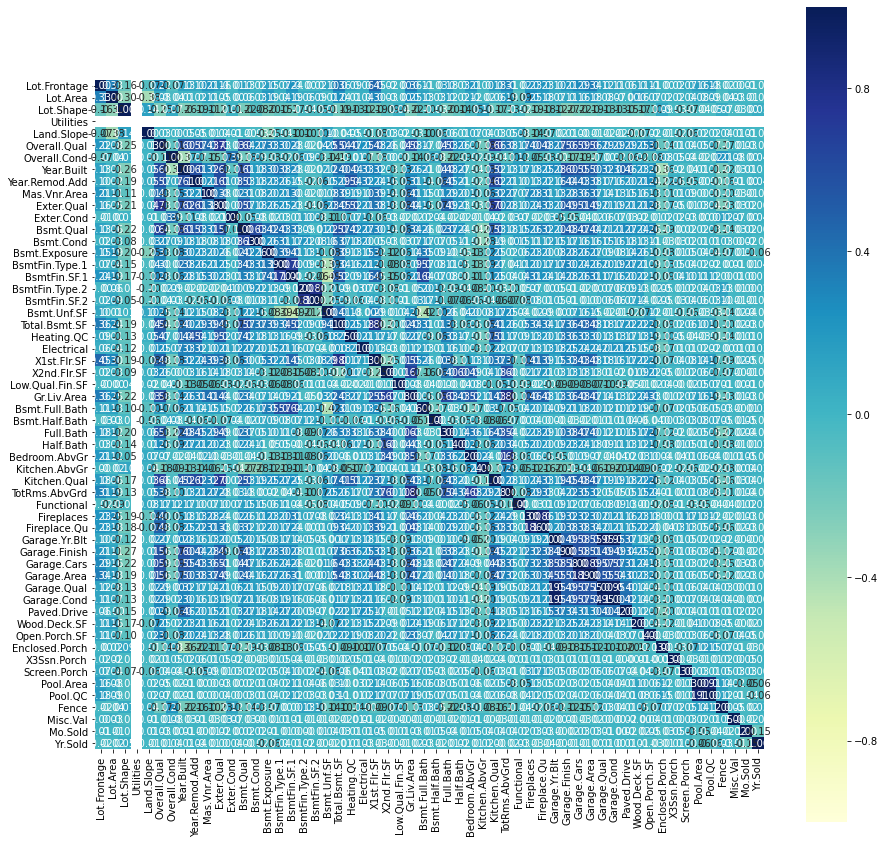

In [40]:
plt.figure(figsize=(15,15))

sns.heatmap(
    X.corr(), 
    vmax=1,
    vmin=-1,
    annot=True,
    square=True,
    cmap = "YlGnBu",
    fmt='.2f'
)
plt.show()


usuwamy kolumny ktore sa silnie skorelowane z innymi kolumnami, korelacja powyzej 0.7

In [41]:
print(f"Przed usunieciem: {X.shape}")
mat = X.corr()
remove = set()
for col in mat.columns:
    for inx in mat.index:
        if inx == col:
            continue
        if abs(mat[col][inx]) > 0.7:
            if col not in remove:
                print(f"""Silna korelacja: columna - {col}, wiersz - {inx} - {mat[col][inx]}
                  uswamy {inx}""")
                remove.add(inx)
                
X = X.drop(remove, axis=1)
print(f"Po usunieciu: {X.shape}")           

Przed usunieciem: (2000, 79)
Silna korelacja: columna - Overall.Qual, wiersz - Exter.Qual - 0.7281909432450417
                  uswamy Exter.Qual
Silna korelacja: columna - BsmtFin.Type.2, wiersz - BsmtFin.SF.2 - 0.7989696964382839
                  uswamy BsmtFin.SF.2
Silna korelacja: columna - Total.Bsmt.SF, wiersz - X1st.Flr.SF - 0.8009598565311208
                  uswamy X1st.Flr.SF
Silna korelacja: columna - Gr.Liv.Area, wiersz - TotRms.AbvGrd - 0.8049637319763092
                  uswamy TotRms.AbvGrd
Silna korelacja: columna - Fireplaces, wiersz - Fireplace.Qu - 0.8625299978818636
                  uswamy Fireplace.Qu
Silna korelacja: columna - Garage.Yr.Blt, wiersz - Garage.Qual - 0.9504201345107106
                  uswamy Garage.Qual
Silna korelacja: columna - Garage.Yr.Blt, wiersz - Garage.Cond - 0.9532892309247818
                  uswamy Garage.Cond
Silna korelacja: columna - Garage.Cars, wiersz - Garage.Area - 0.887741931381585
                  uswamy Garage.Area
Silna

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_test shape: ', X_test.shape, "\n",
      'X_train shape: ', X_train.shape, "\n",
      'y_test shape: ', y_test.shape, "\n",
      'y_train shape: ', y_train.shape, "\n")

X_test shape:  (400, 70) 
 X_train shape:  (1600, 70) 
 y_test shape:  (400,) 
 y_train shape:  (1600,) 



In [43]:
seed=123
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=5, random_state=seed)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


# Tworzenie modelii decyzyjnych

wyszukujemy kolumny numeryczne i nie aby stworzyc osobne pipeline dla zmienych kategorialnych i numerycznych 

In [44]:
numeric_features = []
categorical_features = []
for name, typ in zip(X_train.dtypes.index, X_train.dtypes):
    if typ == 'float64' or typ == 'int64':
        numeric_features.append(name)
    else:
        categorical_features.append(name) 
print(numeric_features)
print(categorical_features)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Utilities', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Mas.Vnr.Area', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'Electrical', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'Functional', 'Fireplaces', 'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Fence', 'Misc.Val', 'Mo.Sold', 'Yr.Sold']
['MS.SubClass', 'MS.Zoning', 'Street', 'Alley', 'Land.Contour', 'Lot.Config', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type', 'House.Style', 'Roof.Style', 'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Type', 'Foundation', 'Heating', 'Central.Air', 'Garage.Type', 'Misc.Fea

In [45]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Pierwszy model - Regresia liniowa

In [46]:
pipe_1 = Pipeline([('preprocessing', preprocessor),
                   ('poly', PolynomialFeatures(degree=2)), 
                   ('classifier', LinearRegression())])

param_grid = {
            'poly__degree': [1,2,3,4,5]
}

grid_1 = GridSearchCV(pipe_1, param_grid, cv=kfold, scoring='r2', n_jobs=-1)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'poly__degree': 2}

### Trenowanie wielu modeli regresyjnych - wybor najlepszego

In [47]:
pipe_2 = Pipeline([('preprocessing', preprocessor),
                   ('classifier', LogisticRegression(C=1))])

param_grid_2 = {
            'classifier__C': [0.0001, 0.001,0.01,0.1,1,10,100,1000]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, scoring='r2', n_jobs=-1)

grid_2.fit(X_train, y_train)
grid_2.best_params_

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

{'classifier__C': 1}

In [48]:
pipe_3 = Pipeline([('preprocessing', preprocessor),
                   ('poly', PolynomialFeatures(degree=2)),
                   ('classifier', Ridge(alpha=1, tol=0.1))])

grid_3 = GridSearchCV(pipe_3,
                      param_grid={'poly__degree': [1, 2, 3, 4],
                                  'classifier__alpha': [1., 2., 3., 4.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)

grid_3.fit(X_train, y_train)
grid_3.best_params_

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape 

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.4 GiB for an array with shape (1280, 1823471) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 991. GiB for an array with shape (1280, 103962600) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 991. GiB for an array with shap

{'classifier__alpha': 4.0, 'poly__degree': 1}

In [49]:
pipe_4 = Pipeline([('preprocessing', preprocessor),
                   ('poly', PolynomialFeatures(degree=2)),
                  ('classifier', Lasso(alpha=1, tol=0.1))])

grid_4 = GridSearchCV(pipe_4,
                      param_grid={'poly__degree': [1, 2, 3, 4],
                                  'classifier__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)
grid_4.fit(X_train, y_train)
grid_4.best_params_

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape 

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.4 GiB for an array with shape (1280, 1823471) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 991. GiB for an array with shape (1280, 103962600) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 991. GiB for an array with shap

{'classifier__alpha': 2.0, 'poly__degree': 1}

In [50]:
pipe_5 = Pipeline([('preprocessing', preprocessor),
                   ('poly', PolynomialFeatures(degree=2)),
                  ('classifier', ElasticNet(alpha=1, tol=0.1))])

grid_5 = GridSearchCV(pipe_5,
                      param_grid={'poly__degree': [1, 2, 3],
                                  'classifier__alpha': [1., 2., 3.]},
                      scoring='r2',
                      cv=kfold, 
                      n_jobs=-1)
grid_5.fit(X_train, y_train)
grid_5.best_params_

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape (1280, 1848224) and data type float64

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
MemoryError: Unable to allocate 17.6 GiB for an array with shape 

{'classifier__alpha': 3.0, 'poly__degree': 2}

In [51]:
pipe_6 = Pipeline([('preprocessing', preprocessor),
                   ('classifier', SVR(kernel='rbf'))])

grid_6= GridSearchCV(pipe_6,
                   param_grid={"classifier__C": [0.01, 0.1, 1, 10, 100, 1000],
                               "classifier__gamma": [0.0001, 0.001, 0.01, 0.1, 1, 10],
                              "classifier__kernel": ["linear", "poly", "rbf"]},
                    scoring='r2',
                    cv=kfold,
                    n_jobs=-1)
grid_6.fit(X_train, y_train)
print(grid_6.best_params_)

{'classifier__C': 0.01, 'classifier__gamma': 10, 'classifier__kernel': 'poly'}


In [52]:
pipe_7 = Pipeline([('preprocessing', preprocessor),
                   ('classifier', DecisionTreeRegressor(max_depth=None, min_samples_split=2,max_features=None))])
                    
grid_7 = GridSearchCV(pipe_7,
                   param_grid={
                   'classifier__max_depth': [20,50,100,200],
                    'classifier__min_samples_split': [2, 5, 10],  
                    'classifier__max_features': [30,50,100,200,500, None]
                   },
                    scoring='r2',
                    cv=kfold,
                    n_jobs=-1)
grid_7.fit(X_train, y_train)
print(grid_7.best_params_)

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:

/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)


{'classifier__max_depth': 200, 'classifier__max_features': 200, 'classifier__min_samples_split': 10}


In [53]:
pipe_8 = Pipeline([('preprocessing', preprocessor),
                   ('classifier', RandomForestRegressor(max_features= 'sqrt', n_estimators=50, oob_score = True))])

grid_8 = GridSearchCV(pipe_8,
                   param_grid={
                   'classifier__n_estimators': [100, 200, 400, 600],
                    'classifier__max_features': ['auto', 'sqrt', 'log2'],  
                    'classifier__max_depth': [200, 500, 1000]
                   },
                    scoring='r2',
                    cv=kfold,
                    n_jobs=-1)
grid_8.fit(X_train, y_train)
print(grid_8.best_params_)

{'classifier__max_depth': 1000, 'classifier__max_features': 'auto', 'classifier__n_estimators': 100}


### Tworzymy model Neural Network z poza Sklearn, biblioteka Keras

In [54]:
pre = preprocessor.fit_transform(X)

In [55]:
X_train_trans, X_test_trans, _,_ = train_test_split(pre, y, test_size=0.2, random_state = 42)

In [56]:
model_NN = Sequential()

def network_architecture():
    model_NN.add(Dense(230,kernel_initializer="normal", activation="relu",input_dim=X_train_trans.shape[1]))
    model_NN.add(Dense(128, activation="relu"))
    model_NN.add(Dense(56, activation="relu"))
    model_NN.add(Dense(1, activation="linear"))
    model_NN.compile(loss='mse', optimizer='adam', metrics=['mse'])
    model_NN.summary()
    return model_NN
    
    

zbiorem validacyjnym bedzie X_test wiec musimy go dostosowac, zgodnie z procesem dla X_train

In [57]:
early_stopping = EarlyStopping(patience=5, monitor="val_loss")
regressor_NN = KerasRegressor(network_architecture, 
                              batch_size=32, 
                              epochs=1000, 
                              verbose=True, 
                              callbacks=[early_stopping],  
                              validation_data= (X_test_trans, y_test))

In [58]:
regressor_NN.fit(X_train_trans, y_train)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 230)               53130     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               29568     
_________________________________________________________________
dense_3 (Dense)              (None, 56)                7224      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 57        
Total params: 89,979
Trainable params: 89,979
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/1000
1600/1600 [==============================] - 2s 1ms/step - loss: 378

# Ocena utworzonych modelii

In [60]:
models = []
models.append(('LR', grid_1.best_estimator_))
models.append(('Logistic Regreesion', grid_2.best_estimator_))
models.append(('Ridge', grid_3.best_estimator_))
models.append(('Lasso', grid_4.best_estimator_))
models.append(('ElasticNet', grid_5.best_estimator_))
models.append(('SVR', grid_6.best_estimator_))
models.append(('DecisionTreeRegressor', grid_7.best_estimator_))
models.append(('RandomForestRegressor', grid_8.best_estimator_))


r2 = []
explained_variance_score = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []
for name, model in models:
    r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    mean_squared_error.append(metrics.mean_squared_error(y_test, model.predict(X_test)))
    mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))

In [61]:
print('Neural Network')
r2.append(metrics.r2_score(y_test, regressor_NN.predict(X_test_trans)))
explained_variance_score.append(metrics.explained_variance_score(y_test, regressor_NN.predict(X_test_trans)))
median_absolute_error.append( metrics.median_absolute_error(y_test, regressor_NN.predict(X_test_trans)))
mean_squared_error.append(metrics.mean_squared_error(y_test, regressor_NN.predict(X_test_trans)))
mean_absolute_error.append(metrics.mean_absolute_error(y_test, regressor_NN.predict(X_test_trans)))

Neural Network
400/400 [==============================] - 0s 196us/step


In [62]:
d = {'r2': r2, 
     'explained_variance_score': explained_variance_score, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error,
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LR','Logistic Regreesion','Ridge', 
                                         'Lasso','ElasticNet','SVR','DecisionTreeRegressor',
                                         'RandomForestRegressor', 'Neural Network'])

df

,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,LR,-2.216195e+16,-2.212083e+16,5.604749e+12,1.664524e+26,8.574120e+12
1,Logistic Regreesion,6.210303e-01,6.384431e-01,1.750000e+04,2.846339e+09,3.137106e+04
2,Ridge,7.653913e-01,7.657336e-01,1.210890e+04,1.762082e+09,1.883336e+04
3,Lasso,7.072016e-01,7.080528e-01,1.605426e+04,2.199130e+09,2.376599e+04
4,ElasticNet,4.876591e-01,4.877956e-01,1.109624e+04,3.848054e+09,1.833170e+04
5,SVR,-9.970470e-01,-9.929894e-01,1.049547e+04,1.499928e+10,2.155169e+04
6,DecisionTreeRegressor,8.120762e-01,8.128502e-01,1.384167e+04,1.411444e+09,2.264339e+04
7,RandomForestRegressor,8.515442e-01,8.516772e-01,1.012779e+04,1.115012e+09,1.732232e+04
8,Neural Network,7.695721e-01,7.712333e-01,1.274042e+04,1.730681e+09,1.921129e+04


Dla R2, explained_variance_score najlepiej wypada model RandomForestRegressor, ale roznica do DecisionTreeRegressor jest nie duza

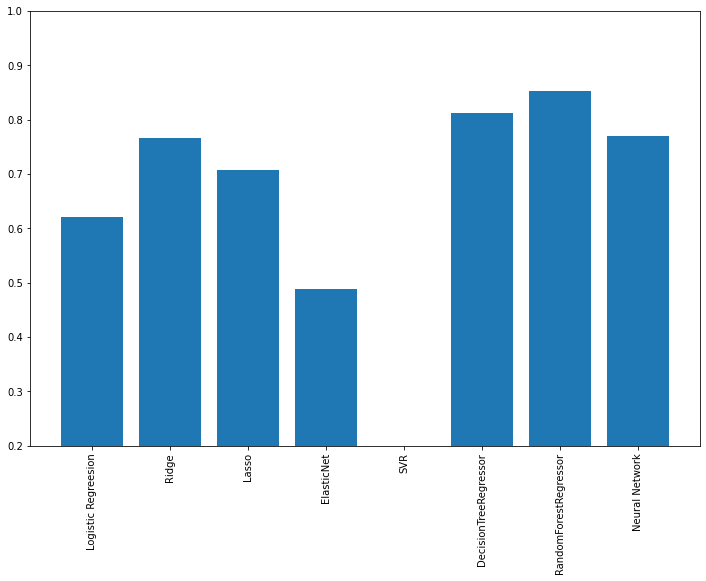

In [72]:

plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.ylim((0.2,1.))
plt.bar(df['Method'][1:], df['r2'][1:])
plt.show()

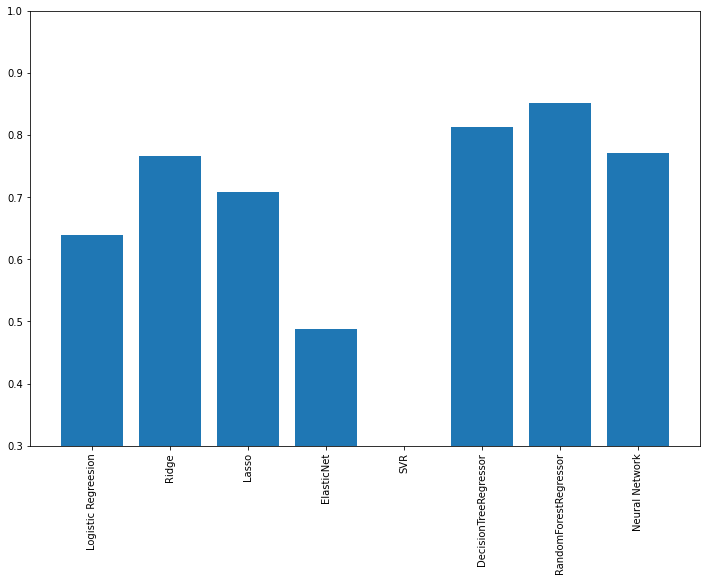

In [73]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.ylim((0.3,1.))
plt.bar(df['Method'][1:], df['explained_variance_score'][1:])
plt.show()

Dla median_absolute_error najlepiej wypada dla RandomForestRegeressor, kolejnym jest SVR

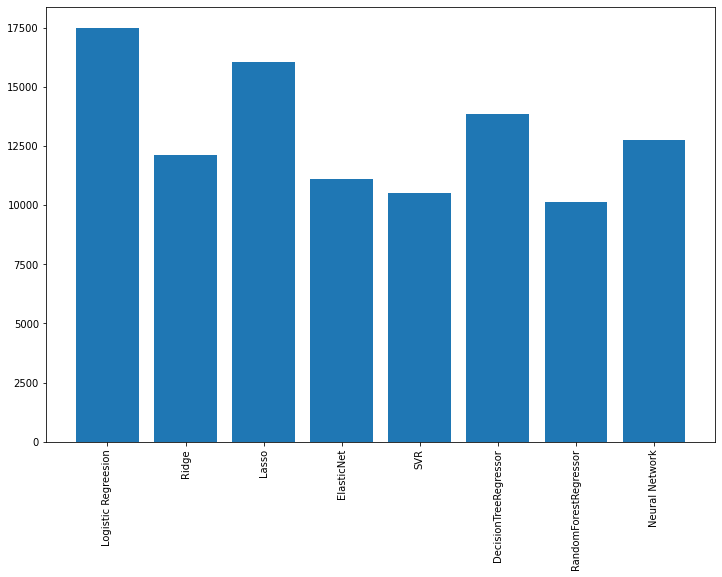

In [74]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.bar(df['Method'][1:], df['median_absolute_error'][1:])
plt.show()

Dla mean_squared_error ponownie najlepszy okazuje sie RandomForestRegresor wyprzedzajac nieznacznie DecsionTreeRegressor

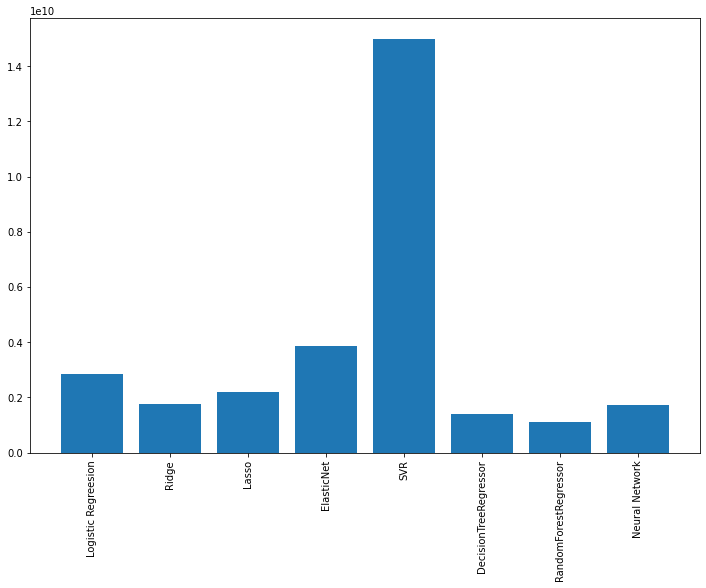

In [66]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.bar(df['Method'][1:], df['mean_squared_error'][1:])
plt.show()

Dla mean_absolute_error RandomForestRegression, ale blisko jego poziomow jest rowniez Elasticnet i Ridge

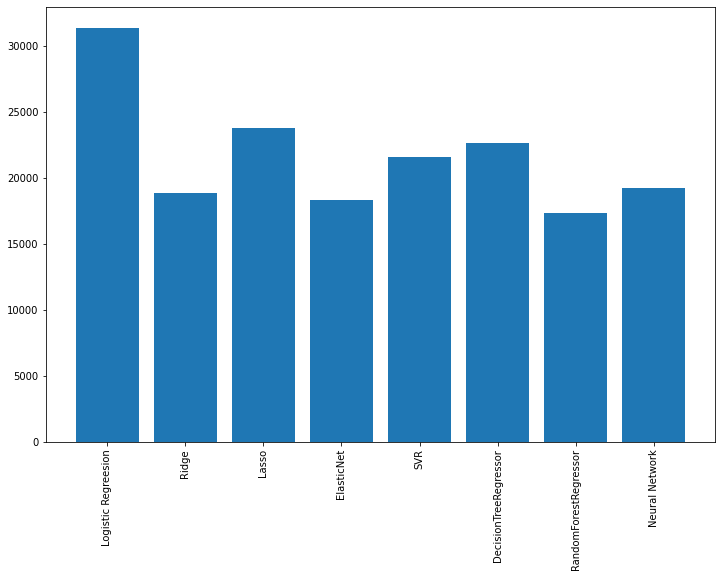

In [67]:
plt.figure(figsize=(12,8))
plt.xticks(rotation='vertical')
plt.bar(df['Method'][1:], df['mean_absolute_error'][1:])
plt.show()

# Podsumowanie 

    Podsumowujac, w badanych danych najlepiej spisywaly sie algorytm RandomForestRegressor. Na prezentowanym ponizej wykresach widac,ze algorytm Liniowej regressi nie dopasowa sie skutecznie, wiele wartosci bardzo silnie odstaje od wartosici rzeczywistych. Widac rowniez ze najlepiej alorytmy potrafily przewidzec tam warosci dla ktorych bylo wczesniej duzo przykladow.

In [68]:
def drow_true_predict_values(estimator, test):
    pred = estimator.predict(test)
    plt.figure(figsize=(15,10))
    plt.plot(y_test,y_test)
    plt.scatter(y_test, pred, c='r')
    plt.show()

LR


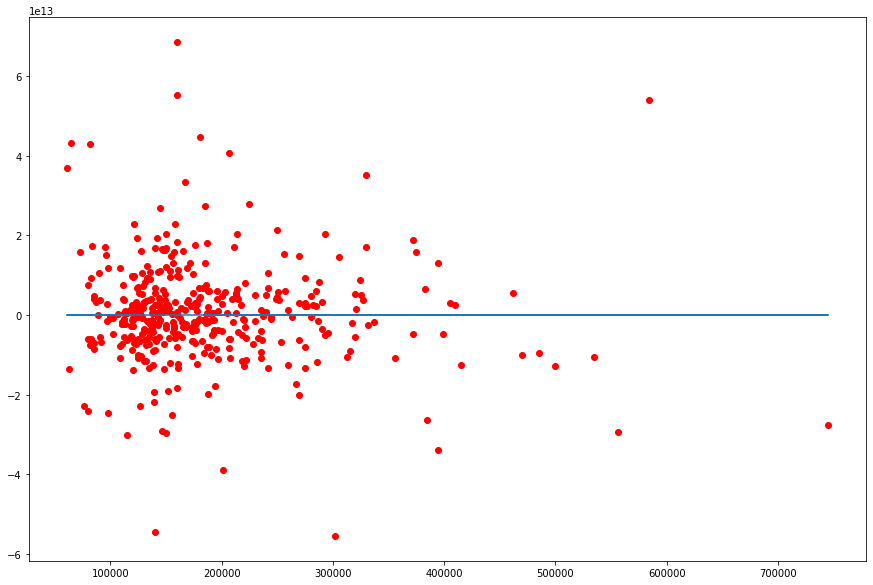

Logistic Regreesion


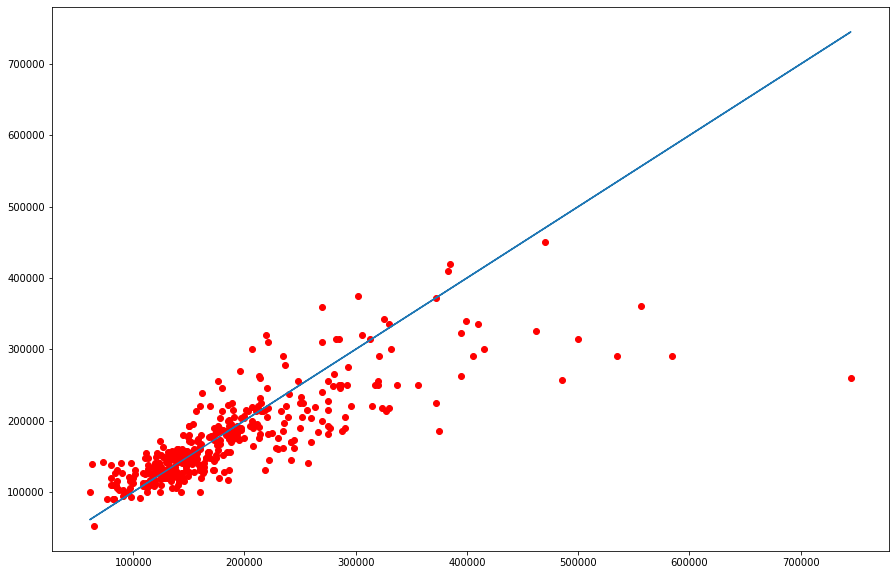

Ridge


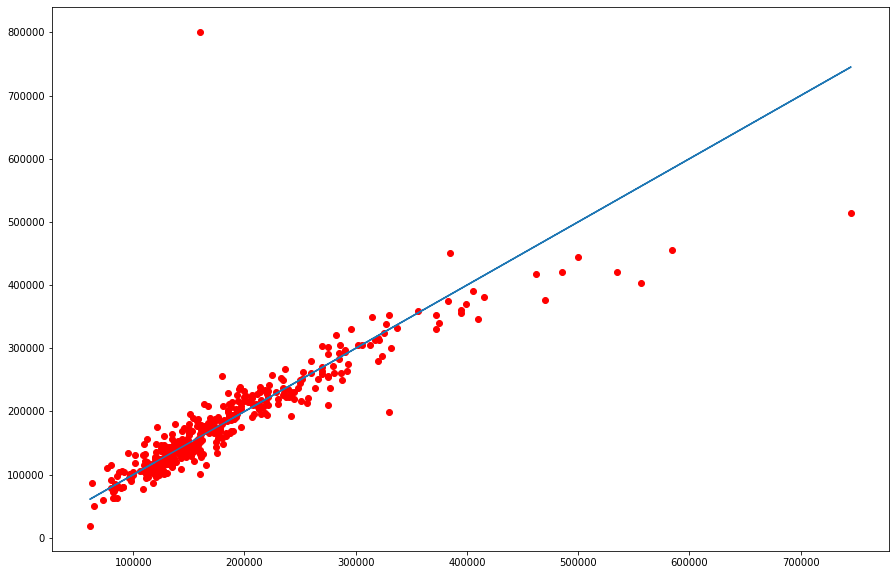

Lasso


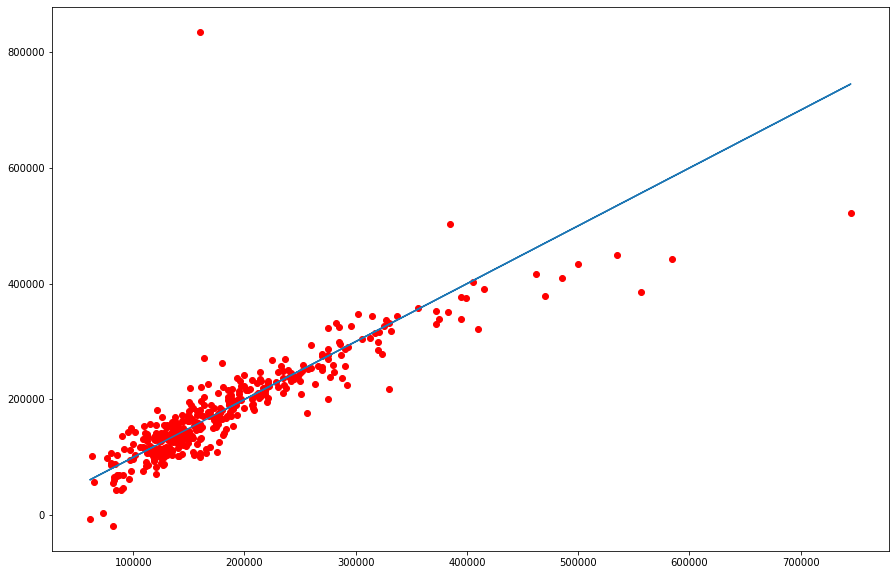

ElasticNet


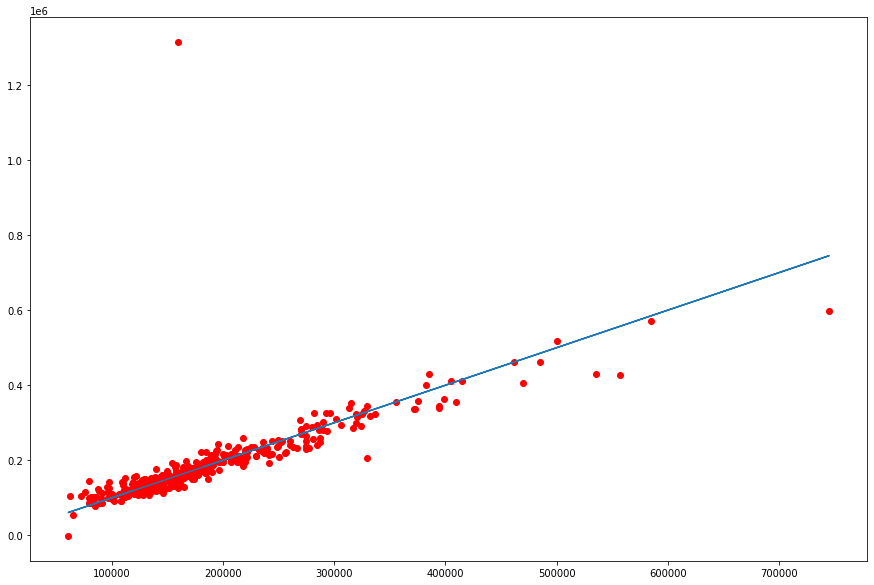

SVR


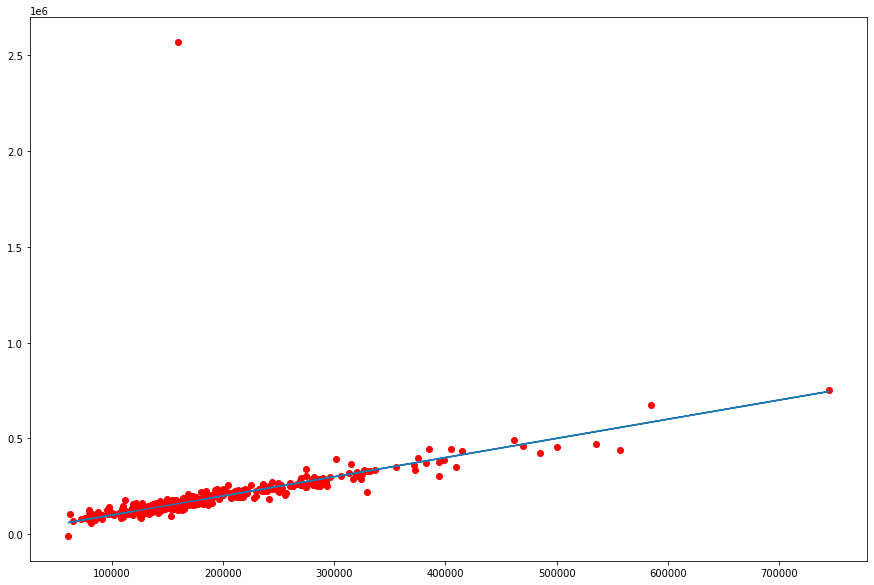

DecisionTreeRegressor


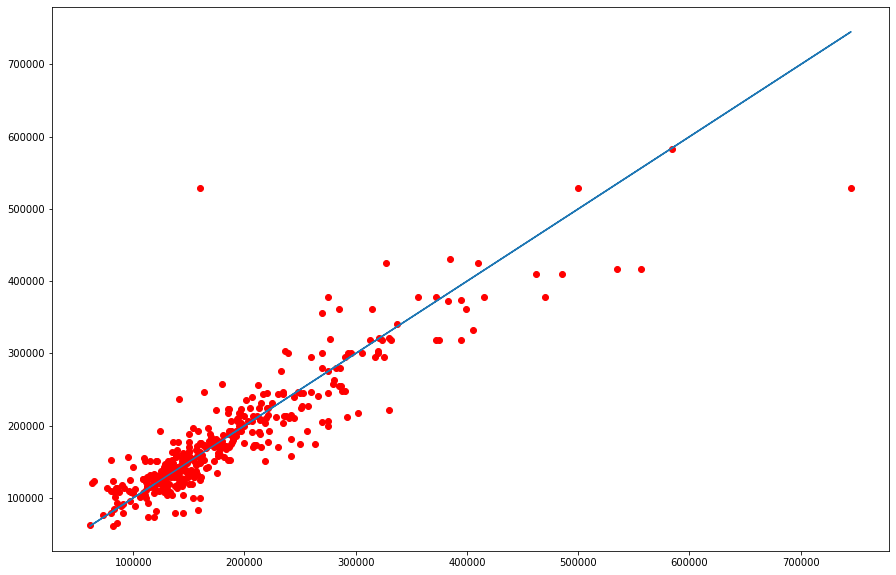

RandomForestRegressor


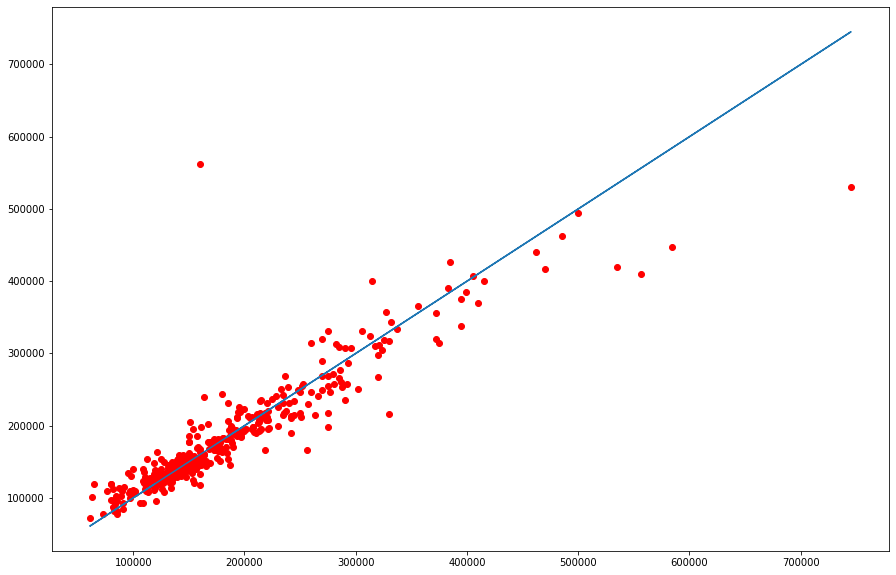

In [69]:
for name, model in models:
    print(name)
    drow_true_predict_values(model, X_test)

Neural Network
400/400 [==============================] - 0s 93us/step


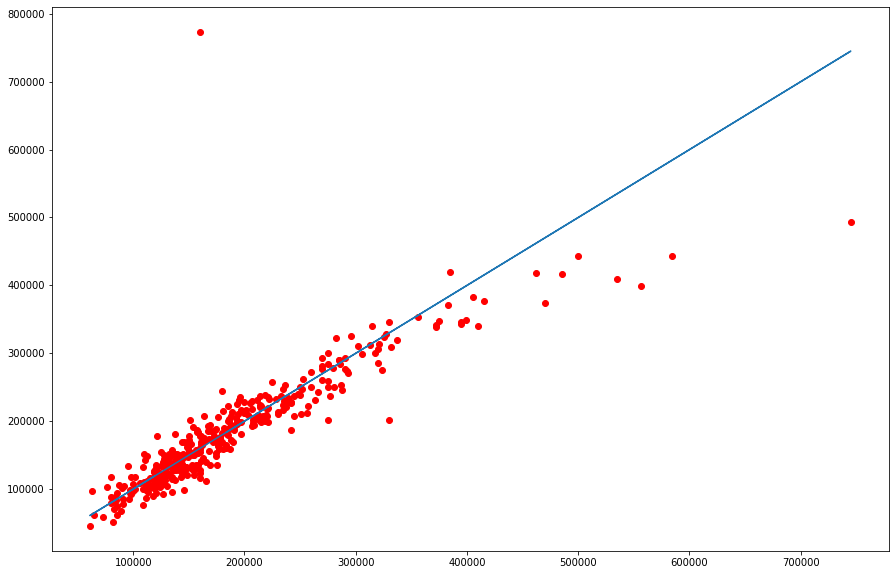

In [70]:
print('Neural Network')
drow_true_predict_values(regressor_NN, X_test_trans)